# Bracketing Methods (Ch. 5)



## Graphic and Try-and-Error Approaches


Shin saves money by making regular monthly deposits $p$ to his account. Assume that the annual interest rate is $r$. Then the total amount that Shin will have after $n$ payments is 

$$ A = p + p(1 + r/12) + \cdots + p (1+r/12)^{n-1} = 12p/r * (ratio^n -1) $$

where $ratio=1 + r/12$. 

Suppose that $A$ is Shin's target amount of money. Shin wants to have $A$ within $n$ month. What is the interest rate to achieve the goal? 

In otherwords, 
we want to find the root $r$ such that 
$$ f(r) = 12p/r (ratio^n - 1) - A = 0$$
holds. 

In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 



In [2]:
# ex 
def func(interest,duration,deposit,target):
    ratio = 1. + interest/12.
    return 12.0* deposit / interest * (ratio**duration - 1.0) - target

from functools import partial

duration = 24
deposit = 60.
target = 1500.
g = partial(func, duration=duration, deposit=deposit, target=target)

In [3]:
r = np.linspace(0.01,0.1,10)
print(r)
y = g(r)
print(y)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
[-46.11529648 -32.05969522 -17.83093771  -3.42673514  11.15523204
  25.91731446  40.86189431  55.99138571  71.30823514  86.8149219 ]


We can use the graphical approach to estimate the interest. 

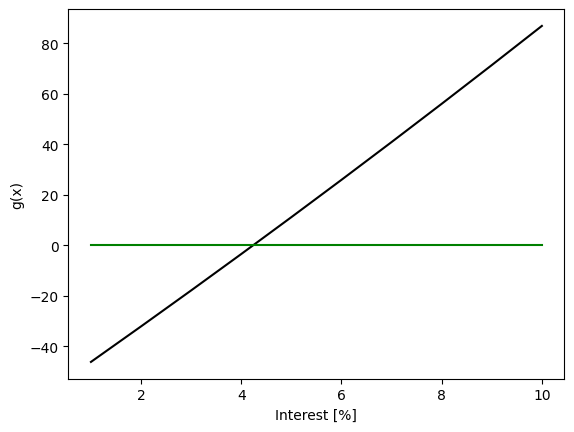

In [4]:
plt.plot(r*100.,y,'k')
plt.xlabel('Interest [%]')
plt.ylabel('g(x)')
plt.plot(r*100.,y*0,'g')

[0.04       0.04111111 0.04222222 0.04333333 0.04444444 0.04555556
 0.04666667 0.04777778 0.04888889 0.05      ]
[-3.42673514 -1.81533778 -0.20174263  1.41405353  3.03205391  4.65226174
  6.27468024  7.89931263  9.52616215 11.15523204]


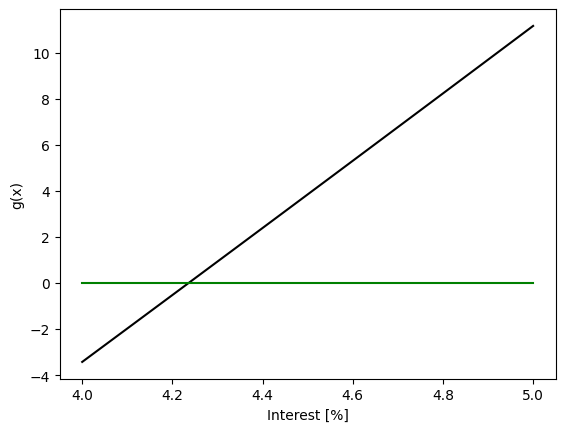

In [5]:
r = np.linspace(0.04,0.05,10)
print(r)
y = g(r)
print(y)
plt.plot(r*100.,y,'k')
plt.xlabel('Interest [%]')
plt.ylabel('g(x)')
plt.plot(r*100.,y*0,'g')

[0.042      0.04211111 0.04222222 0.04233333 0.04244444 0.04255556
 0.04266667 0.04277778 0.04288889 0.043     ]
[-0.52463764 -0.36320114 -0.20174263 -0.04026211  0.12124042  0.28276496
  0.44431153  0.60588012  0.76747074  0.92908338]


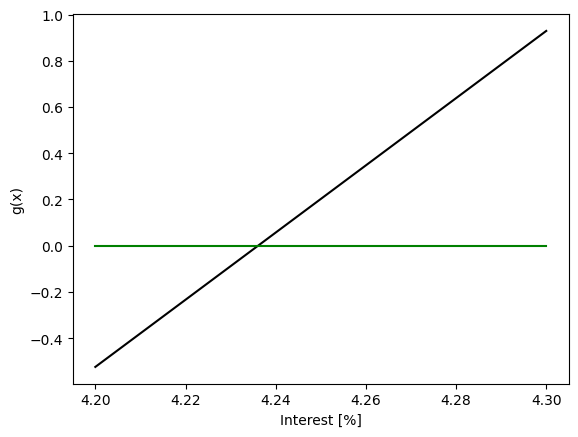

In [6]:
r = np.linspace(0.042,0.043,10)
print(r)
y = g(r)
print(y)
plt.plot(r*100.,y,'k')
plt.xlabel('Interest [%]')
plt.ylabel('g(x)')
plt.plot(r*100.,y*0,'g')

We can use trial-and-error approach 

In [66]:
g(0.0423)
g(0.0424)
g(0.04235)
g(0.04238)
g(0.04237)
g(0.04236)

-0.0015035139415431331

If Shin deposits $60 every month and the interest rate is 4.3%, then he will have about $1,500 in 2 years. 


## Incremental Approach

In [68]:
def incsearch(func, xmin, xmax, ns=50):
    x = np.linspace(xmin,xmax,ns)

    f = []
    for k in range(ns-1):
        f.append(func(x[k]))

    nb = 0 # bracket counter
    xb = []
    for k in range(ns-2):
        if func(x[k])*func(x[k+1])<0:
            nb = nb + 1
            xb.append((x[k],x[k+1]))
    
    if nb == 0:
        return 'no brakets found'
    else:
        return nb, xb

In [77]:
# ex 5.3

f = lambda x: np.sin(10*x) + np.cos(3*x)
xmin = 3.
xmax = 6.
nb, xb = incsearch(f, xmin, xmax)
print('nb=',nb)
xb


nb= 5


[(3.2448979591836733, 3.306122448979592),
 (3.306122448979592, 3.36734693877551),
 (3.7346938775510203, 3.795918367346939),
 (4.653061224489796, 4.714285714285714),
 (5.63265306122449, 5.6938775510204085)]

In [73]:
x = np.linspace(xmin,xmax)
y = f(x)

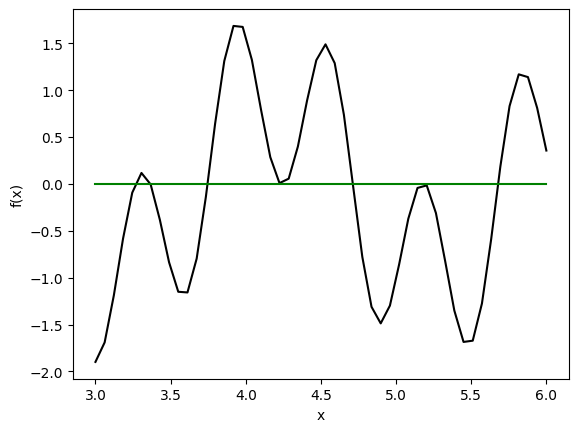

In [75]:
plt.plot(x,y,'k')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y*0,'g')

We note that five sign changes are detected.

In [78]:
nb, xb = incsearch(f, xmin, xmax, ns=100)
print('nb=',nb)
xb

nb= 9


[(3.242424242424242, 3.2727272727272725),
 (3.3636363636363638, 3.393939393939394),
 (3.7272727272727275, 3.757575757575758),
 (4.212121212121212, 4.242424242424242),
 (4.242424242424242, 4.2727272727272725),
 (4.696969696969697, 4.7272727272727275),
 (5.151515151515151, 5.181818181818182),
 (5.181818181818182, 5.212121212121213),
 (5.666666666666667, 5.696969696969697)]

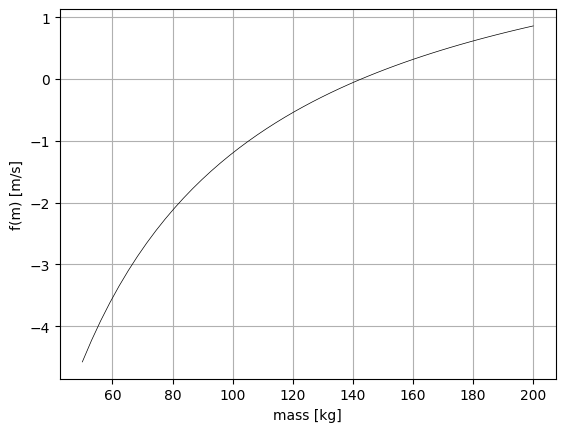

In [82]:
# Recall ex 5.1
# estimate the mass of the bungee jumper 
# the fall velocity is a function of mass at a given time t 
# v(m) = RHS(m)
# define a new function f(m) = RHS(m) - v(m)
# we seek m such that f(m) = 0 

cd = 0.25 
g = 9.81 
v = 36.
t = 4.
mp = np.linspace(50.,200.)
fp = np.sqrt(mp*g/cd)*np.tanh(np.sqrt(cd*g/mp)*t)-v 
plt.plot(mp,fp,c='k',lw=0.5)
plt.xlabel('mass [kg]')
plt.ylabel('f(m) [m/s]')
plt.grid()

In [86]:
# error 
mp = 142
fp = np.sqrt(mp*g/cd)*np.tanh(np.sqrt(cd*g/mp)*t)-v 
err = np.abs(fp/v)*100
print(err)

0.0421094683846077


## Bisection Method

In [91]:
# ex 5.4
xtrue = 142.7376

# set a bracket [50,200]
xl = 50.
xu = 200. 

c = (xl+xu)/2
print('c=', c)

err = np.abs((xtrue - c)/xtrue) * 100 
print('err={0:8.1f}%'.format(err))



c= 125.0
err=    12.4%


In [102]:
# determine where the root is
fm = lambda m: np.sqrt(m*g/cd)*np.tanh(np.sqrt(cd*g/m)*t)-v 
print('left interval =', fm(xl)*fm(c))
print('right interval =', fm(c)*fm(xu))

left interval = 1.871144262315414
right interval = -0.35151600345419215


In [ ]:
# update new interval and repeat this procedure


In [95]:
def bisect1(func, xl, xu, maxit=20):
    if (func(xl)*func(xu)>0):
        return 'initial estimates do not bracket solution'
    
    for i in range(maxit):
        c = (xl+xu)/2
        if (func(c)*func(xl)>0):
            xl = c 
        else:
            xu = c
        
    return c 


In [103]:
m = bisect1(fm, 50, 200)
print('mass = ',m)

mass =  142.73762702941895


In [98]:
def bisect(func, xl, xu, es=1e-7, maxit=30):
    if (func(xl)*func(xu)>0):
        return 'initial estimates do not bracket solution'

    cold = xl    
    for i in range(maxit):
        c = (xl+xu)/2
        ea = np.abs((c - cold)/c)
        if (ea < es): break
        if (func(c)*func(xl)>0):
            xl = c 
        else:
            xu = c
        cold = c
    return c, func(c), ea, i+1



In [107]:
(m, fmm, ea, iter) = bisect(fm, 50, 200)

print('m=',m)
print('fmm=',fmm)
print('ea=',ea)
print('iter=',iter)

m= 142.73763597011566
fmm= 5.8537374059142167e-08
ea= 6.2637276115323e-08
iter= 24


## False Position

In [110]:
# ex 5.6

xl = 50.
xu = 200.
print('f(xl)=',fm(xl))
print('f(xu)=',fm(xu))

c = (fm(xu)*xl - fm(xl)*xu) / (fm(xu)-fm(xl))
print('c=',c)
print('f(c)=',fm(c))

f(xl)= -4.57938708038753
f(xu)= 0.8602906131757351
c= 176.27734596682876
f(c)= 0.5661743751038202


In [ ]:

# repeat the procedure
